In [ ]:
# weather data analysis
# author: Vivian
# filename: weather analysis
# description

In [1]:
# import
import pandas as pd

In [7]:
# read data & assign header
temps = pd.read_csv('temp_1986.csv', names=['station', 'wban', 'month', 'day', 'F'])

# filter for jan
temps = temps[temps.month==1]

# filter; & means and ; | means or
#temps= temps[(temps.month == 1) | (temps.day==12)]

# delete unnecessary cols
temps = temps.drop(columns=['wban', 'month'])

temps


,station,day,F
0,10010.0,1,17.2
1,10010.0,2,12.1
2,10010.0,3,10.4
3,10010.0,4,17.4
4,10010.0,5,26.5
...,...,...,...
2436571,NaN,27,63.1
2436572,NaN,28,59.6
2436573,NaN,29,57.7
2436574,NaN,30,60.4


In [15]:
# read station data
stations = pd.read_csv('stations.csv', names=['station', 'wban', 'lat', 'lon'])

# drop unnecessary col
stations = stations.drop(columns=['wban'])

# dropping rows w/ missing info
stations = stations.dropna()

# drrop duplicates
stations = stations.drop_duplicates(subset='station')

stations

,station,lat,lon
2,7018.0,0.000,0.000
4,7026.0,0.000,0.000
12,7070.0,0.000,0.000
18,8268.0,32.950,65.567
19,8307.0,0.000,0.000
...,...,...,...
28116,998700.0,50.450,6.107
28117,998710.0,47.133,20.200
28121,999110.0,42.217,20.750
28122,999120.0,43.867,18.300


In [16]:
# full join, groupby station
# merge (joining) station and temperature data so that rows of the same station ID line up
merged = pd.merge(stations, temps, on='station')
merged


,station,lat,lon,day,F
0,10010.0,70.933,-8.667,1,17.2
1,10010.0,70.933,-8.667,2,12.1
2,10010.0,70.933,-8.667,3,10.4
3,10010.0,70.933,-8.667,4,17.4
4,10010.0,70.933,-8.667,5,26.5
...,...,...,...,...,...
204485,994400.0,38.900,-76.440,27,30.7
204486,994400.0,38.900,-76.440,28,16.5
204487,994400.0,38.900,-76.440,29,20.0
204488,994400.0,38.900,-76.440,30,25.6


In [17]:
import math

def haversine(lat1, lon1, lat2, lon2):

    radius_earth = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius_earth * c

    return d

In [23]:
# temp at cape canaveral flordia lat: 28.396937
# temp at cape canaveral flordia lon: -80.605659

def distance_to_cape(lat, lon):
    return haversine(lat, lon, 28.396937, -80.605659)

In [19]:
distance_to_cape(28.0, -80)

73.9654553295124

In [21]:
distance_to_cape(28.3, -80.6)

10.793119298705765

In [22]:
distance_to_cape(28.396937, -80.605659)

0.0

In [27]:
merged['distance'] = merged.apply(lambda row: distance_to_cape(row.lat, row.lon), axis=1)

merged

,station,lat,lon,day,F,distance
0,10010.0,70.933,-8.667,1,17.2,6384.036761
1,10010.0,70.933,-8.667,2,12.1,6384.036761
2,10010.0,70.933,-8.667,3,10.4,6384.036761
3,10010.0,70.933,-8.667,4,17.4,6384.036761
4,10010.0,70.933,-8.667,5,26.5,6384.036761
...,...,...,...,...,...,...
204485,994400.0,38.900,-76.440,27,30.7,1229.491958
204486,994400.0,38.900,-76.440,28,16.5,1229.491958
204487,994400.0,38.900,-76.440,29,20.0,1229.491958
204488,994400.0,38.900,-76.440,30,25.6,1229.491958


In [29]:
# filter for stations near the cape
max_distance = 100 # km

cstations = merged[merged.distance <= max_distance]
cstations

,station,lat,lon,day,F,distance
153505,722040.0,28.101,-80.644,1,65.0,33.120305
153506,722040.0,28.101,-80.644,2,67.1,33.120305
153507,722040.0,28.101,-80.644,3,64.5,33.120305
153508,722040.0,28.101,-80.644,4,67.6,33.120305
153509,722040.0,28.101,-80.644,5,63.0,33.120305
...,...,...,...,...,...,...
180577,747950.0,28.233,-80.600,27,51.8,18.237378
180578,747950.0,28.233,-80.600,28,39.6,18.237378
180579,747950.0,28.233,-80.600,29,48.4,18.237378
180580,747950.0,28.233,-80.600,30,57.6,18.237378


In [30]:
cstations[cstations.day == 1]

,station,lat,lon,day,F,distance
153505,722040.0,28.101,-80.644,1,65.0,33.120305
153536,722045.0,27.653,-80.243,1,68.4,90.055928
153567,722046.0,28.517,-80.800,1,64.8,23.220357
153598,722050.0,28.434,-81.325,1,64.5,70.470742
153629,722051.0,28.545,-81.333,1,10.6,72.976578
153660,722056.0,29.183,-81.048,1,62.0,97.457358
153691,722057.0,28.780,-81.244,1,63.4,75.490650
180520,747945.0,28.617,-80.700,1,64.1,26.148691
180551,747950.0,28.233,-80.600,1,66.8,18.237378


In [40]:
# p - parameter for inverse distance weighting
p=2

#inverse distances
cstations['inv_distances'] = 1.0 / cstations.distance ** p

# weighted temps
cstations['weighted_F'] = cstations.F * cstations.inv_distances

cstations

/var/folders/9m/1hg1hctj5s94qtlnx8n6561h0000gn/T/ipykernel_3887/801027204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstations['inv_distances'] = 1.0 / cstations.distance ** p
/var/folders/9m/1hg1hctj5s94qtlnx8n6561h0000gn/T/ipykernel_3887/801027204.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstations['weighted_F'] = cstations.F * cstations.inv_distances


,station,lat,lon,day,F,distance,inv_distances,weighted_F
153505,722040.0,28.101,-80.644,1,65.0,33.120305,0.000912,0.059255
153506,722040.0,28.101,-80.644,2,67.1,33.120305,0.000912,0.061169
153507,722040.0,28.101,-80.644,3,64.5,33.120305,0.000912,0.058799
153508,722040.0,28.101,-80.644,4,67.6,33.120305,0.000912,0.061625
153509,722040.0,28.101,-80.644,5,63.0,33.120305,0.000912,0.057432
...,...,...,...,...,...,...,...,...
180577,747950.0,28.233,-80.600,27,51.8,18.237378,0.003007,0.155742
180578,747950.0,28.233,-80.600,28,39.6,18.237378,0.003007,0.119061
180579,747950.0,28.233,-80.600,29,48.4,18.237378,0.003007,0.145519
180580,747950.0,28.233,-80.600,30,57.6,18.237378,0.003007,0.173180


In [41]:
grouped = cstations.groupby(['day'])
grouped

In [42]:
list(grouped)

/var/folders/9m/1hg1hctj5s94qtlnx8n6561h0000gn/T/ipykernel_3887/12018300.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  list(grouped)


[(1,
           station     lat     lon  day     F   distance  inv_distances  \
  153505  722040.0  28.101 -80.644    1  65.0  33.120305       0.000912   
  153536  722045.0  27.653 -80.243    1  68.4  90.055928       0.000123   
  153567  722046.0  28.517 -80.800    1  64.8  23.220357       0.001855   
  153598  722050.0  28.434 -81.325    1  64.5  70.470742       0.000201   
  153629  722051.0  28.545 -81.333    1  10.6  72.976578       0.000188   
  153660  722056.0  29.183 -81.048    1  62.0  97.457358       0.000105   
  153691  722057.0  28.780 -81.244    1  63.4  75.490650       0.000175   
  180520  747945.0  28.617 -80.700    1  64.1  26.148691       0.001463   
  180551  747950.0  28.233 -80.600    1  66.8  18.237378       0.003007   
  
          weighted_F  
  153505    0.059255  
  153536    0.008434  
  153567    0.120181  
  153598    0.012988  
  153629    0.001990  
  153660    0.006528  
  153691    0.011125  
  180520    0.093747  
  180551    0.200841  ),
 (2,
     

In [43]:
# col by col sums
cstations.sum()

station          2.030574e+08
lat              7.937953e+03
lon             -2.256605e+04
day              4.464000e+03
F                1.506590e+04
distance         1.572252e+04
inv_distances    2.488859e-01
weighted_F       1.479944e+01
dtype: float64

In [44]:
cstations.groupby(['day']).sum()

,station,lat,lon,F,distance,inv_distances,weighted_F
day,,,,,,,
1,6550240.0,256.063,-727.937,529.6,507.177987,0.008029,0.515089
2,6550240.0,256.063,-727.937,544.4,507.177987,0.008029,0.537068
3,6550240.0,256.063,-727.937,535.3,507.177987,0.008029,0.518100
4,6550240.0,256.063,-727.937,559.0,507.177987,0.008029,0.542947
5,6550240.0,256.063,-727.937,514.2,507.177987,0.008029,0.498368
6,6550240.0,256.063,-727.937,441.3,507.177987,0.008029,0.433607
7,6550240.0,256.063,-727.937,510.8,507.177987,0.008029,0.509698
8,6550240.0,256.063,-727.937,512.1,507.177987,0.008029,0.507426
9,6550240.0,256.063,-727.937,530.5,507.177987,0.008029,0.522260


In [54]:
daily_data = cstations.groupby(['day']).sum() [['inv_distances', 'weighted_F']]
daily_data['est_F'] = daily_data.weighted_F /daily_data.inv_distances
daily_data

,inv_distances,weighted_F,est_F
day,,,
1,0.008029,0.515089,64.156982
2,0.008029,0.537068,66.894539
3,0.008029,0.518100,64.531925
4,0.008029,0.542947,67.626816
5,0.008029,0.498368,62.074248
6,0.008029,0.433607,54.007969
7,0.008029,0.509698,63.485502
8,0.008029,0.507426,63.202479
9,0.008029,0.522260,65.050063


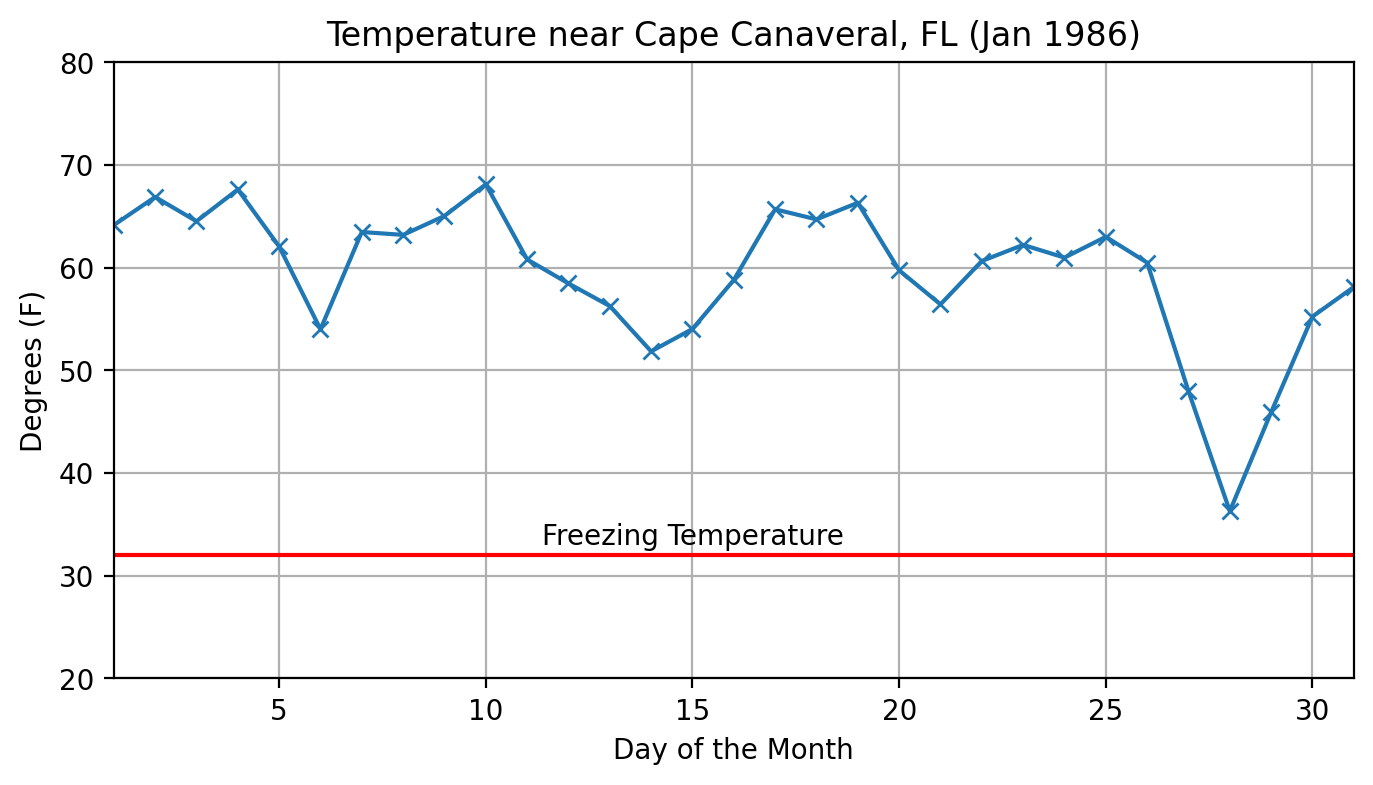

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=200)
plt.title('Temperature near Cape Canaveral, FL (Jan 1986)')
plt.xlabel('Day of the Month')
plt.ylabel('Degrees (F)')
plt.ylim(20,80)
plt.xlim(1,31)
plt.grid()
plt.plot(daily_data.est_F, marker = 'x')
plt.plot([1,31], [32,32], c='red')
plt.text(15, 33, 'Freezing Temperature', ha='center')
plt.show()